In [58]:
print("Microbial Prediction Final Project" + "\n")
# Assignment 5: Machine Learning in Wine!!
import pandas as pd
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
# Seaborn for plotting and styling
import seaborn as sns 
import numpy as np 
import csv
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
import sklearn.metrics as metrics
from sklearn import metrics

data = pd.read_csv('Microbiome.csv', sep='\t')
print(data.head())

Microbial Prediction Final Project

    Maize_Sample  345dcc18d51f44572bd67c08e5e95b8b  \
0  GA188repBS600                                 0   
1    GA1811S1400                                 1   
2    GA1824S1400                                 1   
3  GA1829SLM1400                                 0   
4    GA1813I1400                                 1   

   074e66f75650948b8df12cfe2ffb5f37  060fdbbfa61cbfb4d47350dc2a2019cd  \
0                                 0                                 1   
1                                 0                                 1   
2                                 0                                 1   
3                                 0                                 1   
4                                 0                                 1   

   d2208d27b5df4c53eb547f7ac45f4d6b  574d164310944193d8fc13dc10346e58  \
0                                 0                                 0   
1                                 0                   

In [59]:
# Drop columns that I think wont be meaningful. List below:
# PlantA_Or_B Notes GA_Microbiome Living_Mulch Endophyte, R1, R2, Sample_or_Control, Sampling_Number
# Maybe remove Plate, Row, Column, Well?

data = data.drop(['PlantA_Or_B','Notes','GA_Microbiome','Living_Mulch','Endophyte','R1_Fastq_Name','R2_Fastq_Name','Sample_or_Control','Sampling_Number','Plate','Row','Column','Well'], axis =1)


#drop non numerical columns:
data = data.drop(['Location','Sample_Type','Soil_Test_Number','Living_Mulch_Treatment','Date_Taken','Maize_Sample'], axis =1)

data = data.dropna(axis=0)
print('Drop: We have {} instances of data with {} variables'.format(*data.shape))
data.rename(columns = {'345dcc18d51f44572bd67c08e5e95b8b':'Endo1','074e66f75650948b8df12cfe2ffb5f37':'Endo2','060fdbbfa61cbfb4d47350dc2a2019cd':'Endo3','d2208d27b5df4c53eb547f7ac45f4d6b':'Endo4','574d164310944193d8fc13dc10346e58':'Endo5','8cb92babedb9f4ff7bedee4ac4f47370':'Endo6','3e00a33b844a56c2e00acedeffc43b5e':'Endo7','0f5f7693288de84f4ade2e6abaa2440f':'Endo8','561ed5d9dab98c645f731a40b7b63fa4':'Endo9','a6d4742d8c802171498b62b6d79b1764':'Endo10'}, inplace = True)
print(data.columns)

Drop: We have 409 instances of data with 46 variables
Index(['Endo1', 'Endo2', 'Endo3', 'Endo4', 'Endo5', 'Endo6', 'Endo7', 'Endo8',
       'Endo9', 'Endo10', 'reads', 'Growing_Degree_Days', 'GPSlatitude',
       'GPSlongitude', 'quant_reading', 'precipIntensity', 'precipProbability',
       'temperatureHigh', 'temperatureLow', 'dewPoint', 'humidity',
       'windSpeed', 'uvIndex', 'Lime_Buffer_Capacity', 'pH', 'Water_pH',
       'Base_Saturation_perc', 'Cation_Exchange_Capacity', 'Ca_ppm', 'Cd_ppm',
       'Cr_ppm', 'Cu_ppm', 'Fe_ppm', 'K_ppm', 'Mg_ppm', 'Mn_ppm', 'Mo_ppm',
       'Na_ppm', 'Ni_ppm', 'P_ppm', 'Pb_ppm', 'Zn_ppm', 'Organic_Matter_perc',
       'N_perc', 'Sampling_NumberGDD', 'Concentration'],
      dtype='object')


Microbiome Endophyte Confusion Tables


Confusion Matrix 1


array([[235,  37],
       [128,   9]], dtype=int64)


Confusion Matrix 2


array([[284,  15],
       [ 86,  24]], dtype=int64)


Confusion Matrix 3


array([[210,  13],
       [162,  24]], dtype=int64)


Confusion Matrix 4


array([[222, 111],
       [ 60,  16]], dtype=int64)


Confusion Matrix 5


array([[212, 112],
       [ 72,  13]], dtype=int64)


Confusion Matrix 6


array([[210, 107],
       [ 76,  16]], dtype=int64)


Confusion Matrix 7


array([[202,  79],
       [ 66,  62]], dtype=int64)


Confusion Matrix 8


array([[226,  34],
       [ 51,  98]], dtype=int64)


Confusion Matrix 9


array([[196, 161],
       [ 43,   9]], dtype=int64)


Confusion Matrix 10


array([[225,  15],
       [ 10, 159]], dtype=int64)


Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       240
           1       0.91      0.94      0.93       169

    accuracy                           0.94       409
   macro avg       0.94      0.94      0.94       409
weighted avg       0.94      0.94      0.94       409



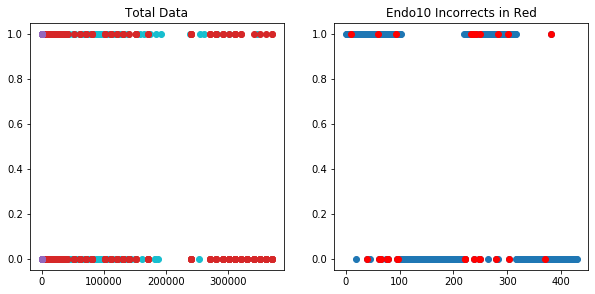

In [57]:
print("Microbiome Endophyte Confusion Tables" + "\n")

X1 = data.drop(columns=['Endo1'])
Y1 = data['Endo1']

X2 = data.drop(columns=['Endo2'])
Y2 = data['Endo2']

X3 = data.drop(columns=['Endo3'])
Y3 = data['Endo3']

X4 = data.drop(columns=['Endo4'])
Y4 = data['Endo4']

X5 = data.drop(columns=['Endo5'])
Y5 = data['Endo5']

X6 = data.drop(columns=['Endo6'])
Y6 = data['Endo6']

X7 = data.drop(columns=['Endo7'])
Y7 = data['Endo7']

X8 = data.drop(columns=['Endo8'])
Y8 = data['Endo8']

X9 = data.drop(columns=['Endo9'])
Y9 = data['Endo9']

X10 = data.drop(columns=['Endo10'])
Y10 = data['Endo10']
#Endophyte 10 was classified the most accurately. 


from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear') #liblinear convergered where saga and lbfgs did not
fit1 = log_reg.fit(X1,Y1)
fit2 = log_reg.fit(X2,Y2)
fit3 = log_reg.fit(X3,Y3)
fit4 = log_reg.fit(X4,Y4)
fit5 = log_reg.fit(X5,Y5)
fit6 = log_reg.fit(X6,Y6)
fit7 = log_reg.fit(X7,Y7)
fit8 = log_reg.fit(X8,Y8)
fit9 = log_reg.fit(X9,Y9)
fit10 = log_reg.fit(X10,Y10)

from sklearn.metrics import confusion_matrix

y_pred1 = log_reg.predict(X1)
print("\n" + "Confusion Matrix 1")
display(confusion_matrix(Y1, y_pred1))

y_pred2 = log_reg.predict(X2)
print("\n" + "Confusion Matrix 2")
display(confusion_matrix(Y2, y_pred2))

y_pred3 = log_reg.predict(X3)
print("\n" + "Confusion Matrix 3")
display(confusion_matrix(Y3, y_pred3))

y_pred4 = log_reg.predict(X4)
print("\n" + "Confusion Matrix 4")
display(confusion_matrix(Y4, y_pred4))

y_pred5 = log_reg.predict(X5)
print("\n" + "Confusion Matrix 5")
display(confusion_matrix(Y5, y_pred5))

y_pred6 = log_reg.predict(X6)
print("\n" + "Confusion Matrix 6")
display(confusion_matrix(Y6, y_pred6))

y_pred7 = log_reg.predict(X7)
print("\n" + "Confusion Matrix 7")
display(confusion_matrix(Y7, y_pred7))

y_pred8 = log_reg.predict(X8)
print("\n" + "Confusion Matrix 8")
display(confusion_matrix(Y8, y_pred8))

y_pred9 = log_reg.predict(X9)
print("\n" + "Confusion Matrix 9")
display(confusion_matrix(Y9, y_pred9))

y_pred10 = log_reg.predict(X10)
print("\n" + "Confusion Matrix 10")
display(confusion_matrix(Y10, y_pred10))

incorrect = data[y_pred10 != Y10]
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(221)
ax.plot(X,Y,"o");
plt.title('Total Data')
ax2 = f.add_subplot(222)   
ax2 = plt.plot(data.Endo10, "o")
ax2 = plt.plot(incorrect.Endo10, "ro")
plt.title('Endo10 Incorrects in Red')
#print("\n" + "List of incorrect rows:")
#print(incorrect)

data = data.assign(y_pred10 = y_pred10)
from sklearn.metrics import classification_report

print("\n" + "Classification Report:" + "\n")
print(classification_report(Y10,y_pred10))